In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [27]:
import bz2
import os
import ujson
import attr

import pandas as pd
import numpy as np
import statsmodels.api as sm

from glob import glob
from collections import Counter, UserDict
from itertools import islice
from tqdm import tqdm_notebook
from sklearn.linear_model import LinearRegression
from scipy import stats

In [28]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [29]:
ds = Dataset('../../data/a-the-and-or.json/')

In [35]:
a_counts = np.array([
    np.array(novel['counts']['a'])
    for novel in ds.novels()
    if sum(novel['counts']['a'])
])

HBox(children=(IntProgress(value=0), HTML(value='')))

In [36]:
a_exp = counts.sum(0) / counts.sum()

In [37]:
a_exp

array([0.055444  , 0.05311305, 0.05237351, 0.05185606, 0.05142017,
       0.0510404 , 0.05074623, 0.05044753, 0.05011286, 0.04999358,
       0.04964832, 0.04946337, 0.04922571, 0.04892361, 0.04870232,
       0.04845247, 0.04804899, 0.04770123, 0.04713796, 0.04614864])

In [38]:
counts[0]

array([1649, 1700, 1812, 1879, 1744, 1632, 1448, 1421, 1528, 1610, 1537,
       1589, 1595, 1546, 1667, 1495, 1611, 1549, 1229, 1247])

In [40]:
np.full(len(counts[0]), counts[0].sum()) * a_exp

array([1745.820555  , 1672.42378864, 1649.13700961, 1632.84360159,
       1619.11825113, 1607.15996884, 1597.89738268, 1588.49187189,
       1577.95366429, 1574.19788011, 1563.32643647, 1557.5024488 ,
       1550.01915966, 1540.50664647, 1533.53849745, 1525.67152828,
       1512.96652211, 1502.01635527, 1484.27994349, 1453.1284882 ])

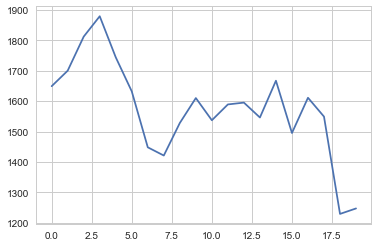

In [41]:
plt.plot(counts[0])

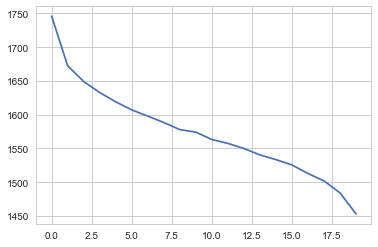

In [42]:
plt.plot(np.full(len(counts[0]), counts[0].sum()) * exp)

In [43]:
stats.chisquare(counts[0], np.full(len(counts[0]), counts[0].sum()) * a_exp)

Power_divergenceResult(statistic=198.7543075311041, pvalue=6.022386696834533e-32)

In [53]:
scores = []
for novel in ds.novels():
    
    obs = np.array(novel['counts']['a'])
    
    if obs.sum() == 0:
        continue
    
    exp = np.full(len(obs), obs.sum()) * a_exp
    chi, p = stats.chisquare(obs, exp)
    scores.append((obs, chi, p))

HBox(children=(IntProgress(value=0), HTML(value='')))

In [54]:
df = pd.DataFrame(scores, columns=('obs', 'chi', 'p'))

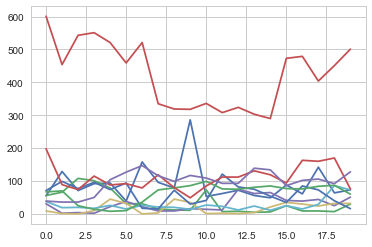

In [60]:
for obs in df.sort_values('p', ascending=True).head(10)['obs']:
    plt.plot(obs)

In [52]:
df.describe()

,chi,p
count,24996.000000,2.499600e+04
mean,38.039984,1.082039e-01
std,18.721085,1.901473e-01
min,5.320692,2.984903e-124
25%,26.365555,5.386509e-04
50%,34.652833,1.537299e-02
75%,45.744311,1.203213e-01
max,643.687793,9.991083e-01
